In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import camb

In [2]:
import sys
sys.path.append('../../')

In [3]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB, synfast_pol

In [4]:
dir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'
cmb_aniso = CMB(dir,nside=2048,model='aniso',Acb=4.0e-6, AEcb=np.radians(-1.0e-3),lensing=False,verbose=True)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected


In [16]:
Q1, U1 = cmb_aniso.get_cb_lensed_QU(1)

In [17]:
A1 = cmb_aniso.alpha_map(1)

In [9]:
elm,blm = hp.map2alm_spin([Q,U],spin=2,)

In [18]:
elm1, blm1 = hp.map2alm_spin([Q1,U1],spin=2,)

In [10]:
alm = hp.map2alm(A)

In [19]:
alm1 = hp.map2alm(A1)

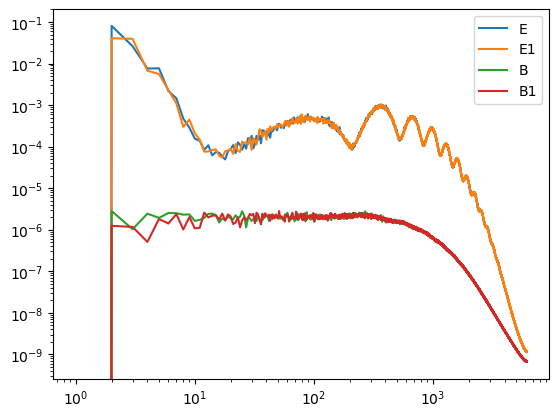

In [20]:
plt.loglog(hp.alm2cl(elm),label='E')
plt.loglog(hp.alm2cl(elm1),label='E1')
plt.loglog(hp.alm2cl(blm),label='B')
plt.loglog(hp.alm2cl(blm1),label='B1')
plt.legend()

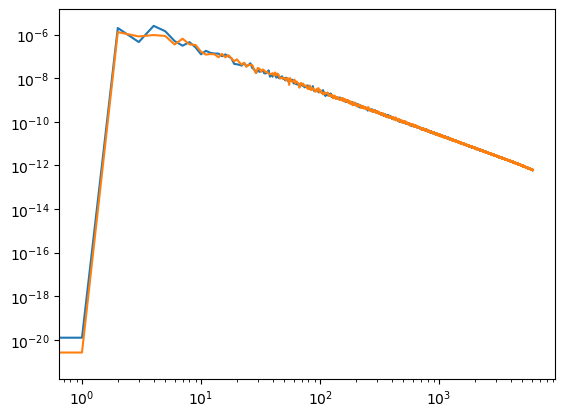

In [21]:
plt.loglog(hp.alm2cl(alm))
plt.loglog(hp.alm2cl(alm1))

In [22]:
np.radians(-1.0e-3)

-1.7453292519943296e-05